In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
users=pd.read_csv('dataset/users.csv',sep=";",encoding='ISO-8859-1')
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
books_r=pd.read_csv('dataset/books_rating.csv',sep=";",encoding='ISO-8859-1')
books_r.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
books=pd.read_csv('dataset/books.csv',sep=';',low_memory="False",encoding='ISO-8859-1',on_bad_lines='skip')
books.head()

C:\Users\aekan\AppData\Local\Temp\ipykernel_49876\567701114.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('dataset/books.csv',sep=';',low_memory="False",encoding='ISO-8859-1',on_bad_lines='skip')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271361 entries, 0 to 271360
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271361 non-null  object
 1   Book-Title           271361 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271361 non-null  object
 4   Publisher            271359 non-null  object
 5   Image-URL-S          271361 non-null  object
 6   Image-URL-M          271361 non-null  object
 7   Image-URL-L          271358 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


<Axes: xlabel='count', ylabel='Book-Author'>

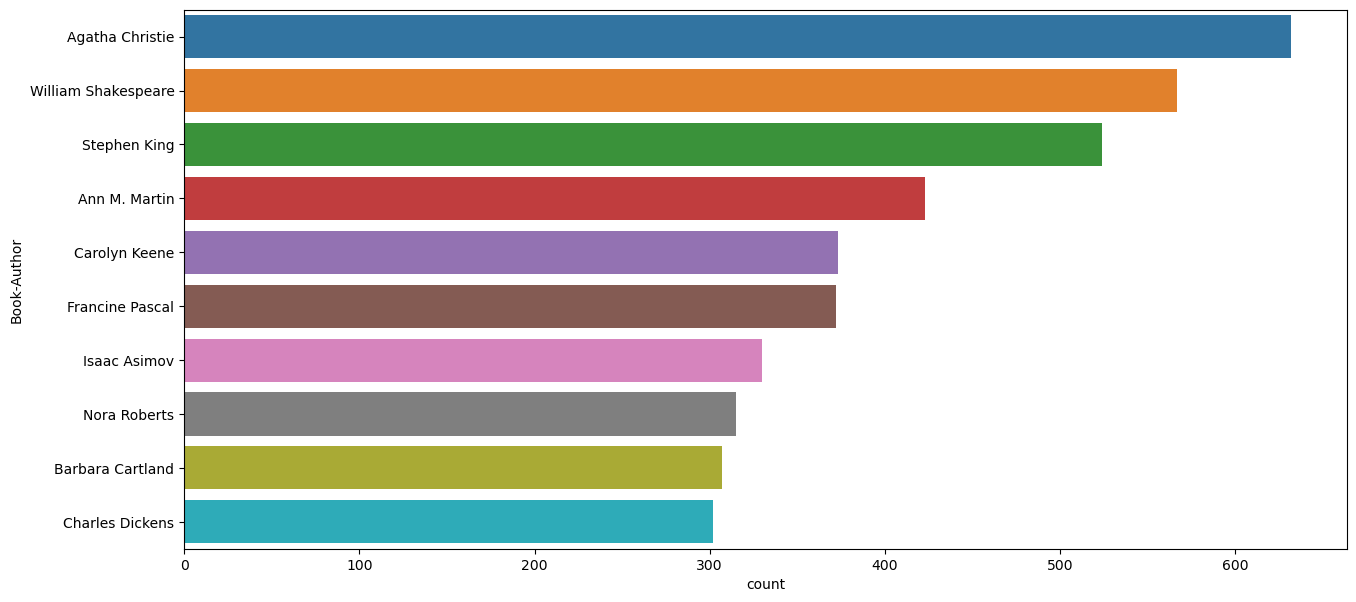

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(y="Book-Author",data=books,order=books.value_counts('Book-Author').iloc[:10].index)

In [7]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=[x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [8]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209539,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221679,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:

books.loc[books['ISBN']=='078946697X','Book-Author']='James Buckley'
books.loc[books['ISBN']=='078946697X','Publisher']='DK Publishing Inc'
books.loc[books['ISBN']=='078946697X','Year-Of-Publication']=2000

books.loc[books['ISBN']=='0789466953','Book-Author']='Michael Teitelbaum'
books.loc[books['ISBN']=='0789466953','Publisher']='DK Publishing Inc'
books.loc[books['ISBN']=='0789466953','Year-Of-Publication']=2000

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209539,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221679,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
books.loc[books['ISBN'] == '2070426769','Year-Of-Publication'] = 2003
books.loc[books['ISBN'] == '2070426769','Book-Author'] = "Jean-Marie Gustave Le"
books.loc[books['ISBN'] == '2070426769','Publisher'] = "Gallimard"
books.loc[books['ISBN']== '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books['ISBN'] == '2070426769']



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220732,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [11]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'],errors="coerce")
print(books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
    0 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973
 1972 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950
 1967 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947
 1945 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927
 1931 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917
 1901 2010 1908 1906 1935 1806 2021 2012 2006 1909 2008 1378 1919 1922
 1897 2024 1376 2037]


In [12]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [13]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [14]:
books.fillna('others',inplace=True)

In [15]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 2. RATINGS

In [16]:
books_r.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings=books_r[books_r['ISBN'].isin(books['ISBN'])]
ratings.shape,books_r.shape

((1031141, 3), (1149780, 3))

In [18]:
ratings=ratings[ratings['User-ID'].isin(users['User-ID'])]
ratings.shape

(1031141, 3)

In [19]:
ratings.value_counts('Book-Rating')

Book-Rating
0     647297
8      91805
10     71225
7      66402
9      60778
5      45355
6      31688
4       7617
3       5118
2       2375
1       1481
dtype: int64

In [20]:
implicit_rating=ratings.loc[ratings['Book-Rating']==0]
ratings=ratings.loc[ratings['Book-Rating']!=0]


In [21]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [22]:
book_summary=pd.merge(rating_count,books,on='ISBN')
book_summary.sort_values('Book-Rating',ascending=False).head()


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
21945,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
117746,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
38819,0385504209,487,The Da Vinci Code,Dan Brown,2003,Doubleday
18058,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4131,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [23]:
ratings['avg_rating']=pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].transform('mean'))
ratings['num_of_users']=pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].transform('count'))

In [24]:
ratings

,User-ID,ISBN,Book-Rating,avg_rating,num_of_users
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30
...,...,...,...,...,...
1149771,276704,0743211383,7,6.964912,57
1149773,276704,0806917695,5,5.000000,1
1149775,276704,1563526298,9,7.000000,3
1149777,276709,0515107662,10,8.444444,18


# 3. USERS

In [25]:
users.loc[(users['Age'] > 100) | (users['Age'] < 5), 'Age'] = np.nan

In [26]:
users.isna().sum()

User-ID          0
Location         0
Age         112010
dtype: int64

In [27]:
users.Location.unique()
    

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [28]:
users.Location.nunique()
     

57339

In [29]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 


In [30]:
users.drop('Location',axis=1,inplace=True)

In [31]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [32]:
users.isnull().sum()   

User-ID         0
Age        112010
Country       368
dtype: int64

In [33]:
users['Country'].fillna('others',inplace=True)
users.isnull().sum()   

User-ID         0
Age        112010
Country         0
dtype: int64

In [34]:
users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

In [35]:
users['Age'].fillna(users.Age.mean(),inplace=True)
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [36]:
final=pd.merge(users,ratings,on='User-ID')
final=pd.merge(final,books,on='ISBN')
final.head()

,User-ID,Age,Country,ISBN,Book-Rating,avg_rating,num_of_users,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34.746638,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,34.746638,others,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,34.746638,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,34.746638,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [37]:
c=final['avg_rating'].mean()
r=final['avg_rating']
v=final['num_of_users']
m=final['num_of_users'].quantile(0.75)
final['Score']=(r*v+c*m)/(v+m)
final.head()

,User-ID,Age,Country,ISBN,Book-Rating,avg_rating,num_of_users,Book-Title,Book-Author,Year-Of-Publication,Publisher,Score
0,8,34.746638,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.639545
1,11676,34.746638,others,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.639545
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.639545
3,116866,34.746638,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.639545
4,123629,34.746638,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,7.639545


In [38]:
final.sort_values('Score',ascending=False).drop_duplicates('ISBN').head()

,User-ID,Age,Country,ISBN,Book-Rating,avg_rating,num_of_users,Book-Title,Book-Author,Year-Of-Publication,Publisher,Score
5947,160434,29.000000,usa,0439139597,8,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,9.063508
147634,159506,28.000000,usa,0345339738,10,9.402597,77,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986,Del Rey,9.051117
36916,247452,13.000000,usa,043935806X,8,9.033981,206,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,8.915143
5872,267830,34.746638,usa,0439136369,8,9.082707,133,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,8.900706
5654,105221,15.000000,usa,0439136350,10,9.035461,141,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,8.868170


In [39]:
user_ratings_threshold=5

filter_users = ratings['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings[ratings['User-ID'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

book_ratings_threshold_perc = 0.2
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: users with at least 5 ratings
Number of records: 302220
Filter: top 20% most frequently rated books
Number of records: 182127


In [40]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [41]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [42]:

model_svd = SVD()
cv_results_svd = cross_validate(model_svd,data, cv=10)
pd.DataFrame(cv_results_svd).mean()     

test_rmse    1.580783
test_mae     1.218062
fit_time     4.004203
test_time    0.261332
dtype: float64

In [43]:

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.680687
test_mae     2.288460
fit_time     5.538374
test_time    0.421111
dtype: float64

In [44]:
param_grid = {'n_factors': [5],
              'n_epochs':[100],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.582222880968937
{'n_factors': 5, 'n_epochs': 100, 'lr_all': 0.002, 'reg_all': 0.2}


In [45]:
trainset, testset = train_test_split(data, test_size=0.2)

model = NMF(n_factors=100, n_epochs=100)
model.fit(trainset)
predictions = model.test(testset)

In [46]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
27498,141089,0425151875,8.0,7.422081,False,7.0,0.577919
22874,11120,0142000361,8.0,8.538368,False,9.0,0.538368
843,133689,0440207622,6.0,7.594584,False,8.0,1.594584
32137,208492,0316155306,8.0,8.229439,False,8.0,0.229439
9888,206691,0425150143,7.0,7.448749,False,7.0,0.448749


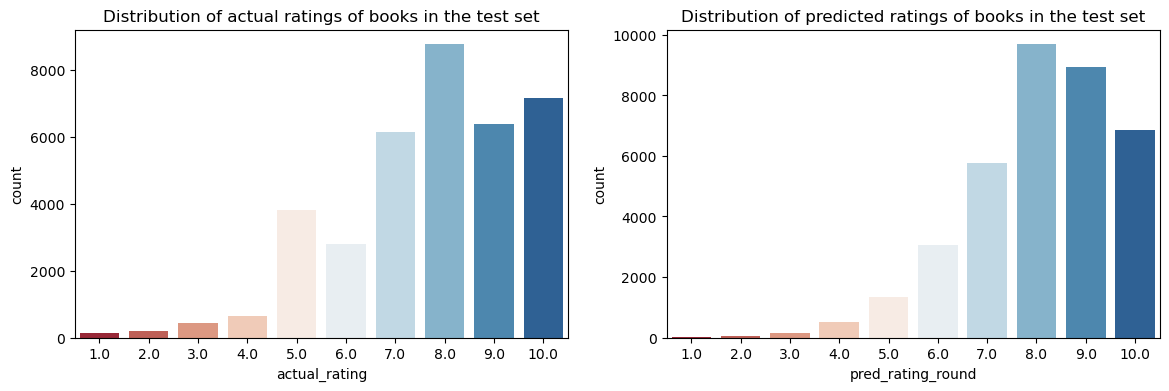

In [47]:

palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

C:\Users\aekan\AppData\Local\Temp\ipykernel_49876\3785201354.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)


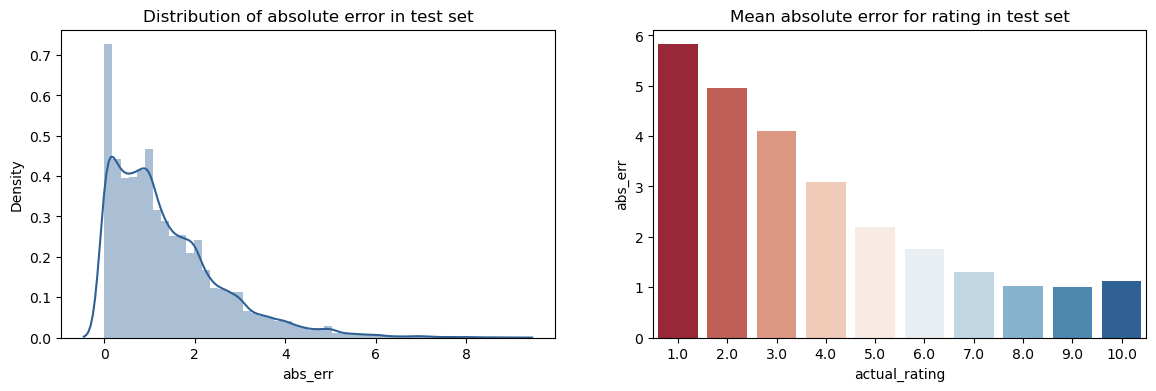

In [48]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

In [49]:
df.rename(columns = {'ISBN':'isbn','User-ID':'user_id','Book-Rating':'book_rating'},inplace=True)
df.head()

,user_id,isbn,book_rating,avg_rating,num_of_users
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
123,276813,8478885218,6,7.333333,3
133,276822,0060096195,10,8.132075,53


In [50]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')
     

In [51]:

selected_user_id = 110912
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)


,user_id,isbn,book_rating,avg_rating,num_of_users,book_title,pred_rating
75576,110912,080410753X,9,8.010204,98,The Kitchen God's Wife,NaN
75535,110912,0439064864,10,8.920635,126,Harry Potter and the Chamber of Secrets (Book 2),NaN
75528,110912,0385484518,10,8.615000,200,"Tuesdays with Morrie: An Old Man, a Young Man,...",NaN
75525,110912,0380730138,9,6.685393,89,Vinegar Hill (Oprah's Book Club (Paperback)),NaN
75513,110912,0316601950,9,7.503676,272,The Pilot's Wife : A Novel,NaN
75547,110912,0517693119,9,9.375000,16,More Than Complete Hitchhiker's Guide,NaN
75563,110912,0684829975,10,7.625000,8,The Vision of Emma Blau,NaN
75507,110912,0312195516,9,8.182768,383,The Red Tent (Bestselling Backlist),NaN
75549,110912,0553250531,10,8.100000,70,The Valley of Horses,NaN
75574,110912,0786889691,9,7.600000,10,The Blue Hour,NaN


In [52]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(10)

,user_id,isbn,book_rating,avg_rating,num_of_users,book_title,pred_rating
75508,110912,0312263120,9,7.413043,46,Digital Fortress : A Thriller,10.000000
75512,110912,0312995423,7,7.703297,91,Digital Fortress : A Thriller,10.000000
75521,110912,0375414053,10,7.757576,33,I Don't Know How She Does It: The Life of Kate...,10.000000
75539,110912,0446600660,10,7.923077,26,Strip Tease,10.000000
75541,110912,0446610038,9,7.728814,177,1st to Die: A Novel,10.000000
75560,110912,0671024094,9,7.833333,30,The Coffin Dancer (Lincoln Rhyme Novels (Paper...,10.000000
75568,110912,0684874350,9,8.386364,132,ANGELA'S ASHES,10.000000
75580,110912,1400031354,10,8.452632,95,Tears of the Giraffe (No.1 Ladies Detective Ag...,10.000000
75561,110912,0671027360,9,8.100372,269,Angels &amp; Demons,9.980265
75533,110912,0399151451,9,8.235294,17,Bad Business,9.904364


In [53]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(10)


,user_id,isbn,book_rating,avg_rating,num_of_users,book_title,pred_rating
75521,110912,0375414053,10,7.757576,33,I Don't Know How She Does It: The Life of Kate...,10.000000
75538,110912,0440226430,10,7.556075,214,Summer Sisters,9.317821
75539,110912,0446600660,10,7.923077,26,Strip Tease,10.000000
75554,110912,0553579754,10,7.677419,62,Fear Nothing,9.408943
75580,110912,1400031354,10,8.452632,95,Tears of the Giraffe (No.1 Ladies Detective Ag...,10.000000
75508,110912,0312263120,9,7.413043,46,Digital Fortress : A Thriller,10.000000
75533,110912,0399151451,9,8.235294,17,Bad Business,9.904364
75541,110912,0446610038,9,7.728814,177,1st to Die: A Novel,10.000000
75560,110912,0671024094,9,7.833333,30,The Coffin Dancer (Lincoln Rhyme Novels (Paper...,10.000000
75561,110912,0671027360,9,8.100372,269,Angels &amp; Demons,9.980265


In [54]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [55]:
df_ratings_top.head()

,User-ID,ISBN,Book-Rating,avg_rating,num_of_users
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
123,276813,8478885218,6,7.333333,3
133,276822,0060096195,10,8.132075,53


In [58]:
df_ratings_top.rename(columns={'User-ID':'userID','Book-Rating':'bookRating'},inplace=True)

In [59]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(12568, 26274)


ISBN,0002005018,0002116286,0002239183,0002240114,0002243962,0002244098,0002251760,0002255081,0002259834,0002550563,...,9681902688,9722016563,9722110500,9722111450,9726101794,9812321764,9812327975,9871138148,B00005UMK6,B00009EF82
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

12568 26274


In [61]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [62]:
ratings_matrix.head(5)

ISBN,0002005018,0002116286,0002239183,0002240114,0002243962,0002244098,0002251760,0002255081,0002259834,0002550563,...,9681902688,9722016563,9722110500,9722111450,9726101794,9812321764,9812327975,9871138148,B00005UMK6,B00009EF82
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
sparsity = 1.0-len(ratings)/float(ratings.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99619395600213 %


In [66]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [67]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,avg_rating,num_of_users,bookTitle
0,276726,0155061224,5,5.000000,1,Rites of Passage
1,276729,052165615X,3,3.000000,1,Help!: Level 1
2,276729,0521795028,6,6.000000,1,The Amsterdam Connection : Level 4 (Cambridge ...
3,276744,038550120X,7,7.580247,81,A Painted House
4,11676,038550120X,10,7.580247,81,A Painted House


In [68]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [69]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [70]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


In [71]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [72]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,avg_rating,num_of_users,bookTitle,TotalRatingCount
0,276726,0155061224,5,5.000000,1,Rites of Passage,5
1,140423,0571117880,8,4.666667,3,Rites of Passage,5
2,164096,0571117880,4,4.666667,3,Rites of Passage,5
3,239872,0571117880,2,4.666667,3,Rites of Passage,5
4,188270,0571191444,5,5.000000,1,Rites of Passage,5


In [73]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   135568.000
mean         2.831
std          9.136
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        707.000
Name: TotalRatingCount, dtype: float64


In [74]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    5.000
0.910    5.000
0.920    5.000
0.930    6.000
0.940    7.000
0.950    8.000
0.960   10.000
0.970   13.000
0.980   17.000
0.990   29.000
Name: TotalRatingCount, dtype: float64


In [75]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [76]:
rating_popular_book.head()

,userID,ISBN,bookRating,avg_rating,num_of_users,bookTitle,TotalRatingCount
7,276744,038550120X,7,7.580,81,A Painted House,366
8,11676,038550120X,10,7.580,81,A Painted House,366
9,16877,038550120X,9,7.580,81,A Painted House,366
10,17975,038550120X,6,7.580,81,A Painted House,366
11,20806,038550120X,6,7.580,81,A Painted House,366


In [77]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (65477, 7)
New dataframe shape (65081, 7)
Removed 396 rows


In [78]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [79]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [80]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
     

Recommendations for I Know This Much Is True (Oprah's Book Club):

1: Here on Earth, with distance of 0.8922946580501716:
2: B Is for Burglar (Kinsey Millhone Mysteries (Paperback)), with distance of 0.9167940062244944:
3: How Stella Got Her Groove Back, with distance of 0.9260209710605742:
4: The River King, with distance of 0.9285651899524676:
5: A Prayer for Owen Meany, with distance of 0.934766369916034:


In [81]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [82]:
us_canada_user_rating_pivot2.head()

bookTitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
26,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
32,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [83]:
us_canada_user_rating_pivot2.shape

(24863, 651)

In [84]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(651, 24863)

In [85]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape
     

(651, 12)

In [86]:
corr = np.corrcoef(matrix)
corr.shape

(651, 651)

In [87]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [88]:
corr_coffey_hands  = corr[coffey_hands]

In [89]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

In [91]:
ratings.head()

,User-ID,ISBN,Book-Rating,avg_rating,num_of_users
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [93]:
ratings_explicit=ratings

In [94]:

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [95]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383844
# of interactions from users with at least 5 interactions: 103271


In [96]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,avg_rating,num_of_users
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


In [97]:
import math

In [98]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [101]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000
52630,0515101230,129074,3.000
68434,0679427724,75819,3.170
85835,0843951346,135149,3.322
92752,1551665727,158295,3.170


In [102]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [103]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [106]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [107]:
users_items_pivot_matrix.shape

(449, 55743)

In [108]:
U.shape

(449, 15)

In [109]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [110]:
Vt.shape

(15, 55743)

In [111]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [112]:
all_user_predicted_ratings.shape

(449, 55743)

In [113]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.015,-0.001,-0.002,0.001,-0.002,-0.003,-0.003,0.007,0.001,0.013,...,0.001,0.003,-0.002,0.008,-0.012,0.001,0.008,0.004,0.011,-0.001
000104687X,0.002,-0.001,-0.002,0.017,-0.001,0.009,0.014,0.007,-0.003,0.016,...,-0.002,0.013,-0.001,0.014,-0.005,-0.006,0.008,0.002,-0.002,0.005
0001047213,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
0001047973,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.004,...,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.001,0.001,0.000


In [114]:
len(cf_preds_df.columns)

449

In [115]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [116]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [117]:

#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [118]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [119]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    